In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.graphics.regressionplots import abline_plot
plt.style.use('seaborn-darkgrid')

In [5]:
national_demand = pd.read_csv('../data/demand_lower_48')

In [6]:
national_demand.head()

,Time,Megawatthours
0,03/21/21 20:00 -0400,390453
1,03/21/21 19:00 -0400,379932
2,03/21/21 18:00 -0400,371950
3,03/21/21 17:00 -0400,365016
4,03/21/21 16:00 -0400,363364


In [7]:
def drop_utc(string):
    return string[:-6]

In [8]:
national_demand['Time'] = national_demand['Time'].apply(lambda x: drop_utc(x))

In [9]:
national_demand['Time'] = pd.to_datetime(national_demand['Time'], errors='coerce')

In [10]:
national_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50180 entries, 0 to 50179
Data columns (total 2 columns):
Time             50180 non-null datetime64[ns]
Megawatthours    50180 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 784.1 KB


In [11]:
national_demand = national_demand.loc[::-1]

In [12]:
national_demand.head()

,Time,Megawatthours
50179,2015-07-01 01:00:00,162827
50178,2015-07-01 02:00:00,335153
50177,2015-07-01 03:00:00,333837
50176,2015-07-01 04:00:00,398386
50175,2015-07-01 05:00:00,388954


In [13]:
national_demand = national_demand.iloc[1:]

In [14]:
national_demand.head()

,Time,Megawatthours
50178,2015-07-01 02:00:00,335153
50177,2015-07-01 03:00:00,333837
50176,2015-07-01 04:00:00,398386
50175,2015-07-01 05:00:00,388954
50174,2015-07-01 06:00:00,392487


In [16]:
national_demand['Year'] = national_demand['Time'].dt.year
national_demand['Month'] = national_demand['Time'].dt.month
national_demand['Hour'] = national_demand['Time'].dt.hour
national_demand['Day_of_week'] = national_demand['Time'].dt.dayofweek
national_demand['Day_of_month'] = national_demand['Time'].dt.day
national_demand['Day_of_year'] = national_demand['Time'].dt.dayofyear
# national_demand['Week_of_year'] = national_demand['Time'].dt.isocalendar().week

In [17]:
national_demand.head()

,Time,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
50178,2015-07-01 02:00:00,335153,2015,7,2,2,1,182
50177,2015-07-01 03:00:00,333837,2015,7,3,2,1,182
50176,2015-07-01 04:00:00,398386,2015,7,4,2,1,182
50175,2015-07-01 05:00:00,388954,2015,7,5,2,1,182
50174,2015-07-01 06:00:00,392487,2015,7,6,2,1,182


In [18]:
national_demand.set_index('Time', inplace=True, drop=True)

In [19]:
national_demand.head()

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
Time,,,,,,,
2015-07-01 02:00:00,335153,2015,7,2,2,1,182
2015-07-01 03:00:00,333837,2015,7,3,2,1,182
2015-07-01 04:00:00,398386,2015,7,4,2,1,182
2015-07-01 05:00:00,388954,2015,7,5,2,1,182
2015-07-01 06:00:00,392487,2015,7,6,2,1,182


In [23]:
split_date = '2020-03-01 00:00:00'
train = national_demand.loc[:split_date]
test = national_demand.loc[split_date:]
res_index_df = national_demand.reset_index()
split_index = res_index_df.loc[res_index_df['Time'] == split_date].index
split_index

Int64Index([40919], dtype='int64')

In [17]:
test.head()

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year,Week_of_year
Time,,,,,,,,
2020-03-01 00:00:00,427034,2020,3,0,6,1,61,9
2020-03-01 01:00:00,414549,2020,3,1,6,1,61,9
2020-03-01 02:00:00,405844,2020,3,2,6,1,61,9
2020-03-01 03:00:00,401647,2020,3,3,6,1,61,9
2020-03-01 04:00:00,399975,2020,3,4,6,1,61,9


In [18]:
X_train = train
y_train = train.pop('Megawatthours')

In [19]:
X_train

,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year,Week_of_year
Time,,,,,,,
2015-07-01 02:00:00,2015,7,2,2,1,182,27
2015-07-01 03:00:00,2015,7,3,2,1,182,27
2015-07-01 04:00:00,2015,7,4,2,1,182,27
2015-07-01 05:00:00,2015,7,5,2,1,182,27
2015-07-01 06:00:00,2015,7,6,2,1,182,27
...,...,...,...,...,...,...,...
2020-02-29 20:00:00,2020,2,20,5,29,60,9
2020-02-29 21:00:00,2020,2,21,5,29,60,9
2020-02-29 22:00:00,2020,2,22,5,29,60,9


In [20]:
y_train

Time
2015-07-01 02:00:00    335153
2015-07-01 03:00:00    333837
2015-07-01 04:00:00    398386
2015-07-01 05:00:00    388954
2015-07-01 06:00:00    392487
                        ...  
2020-02-29 20:00:00    441982
2020-02-29 21:00:00    447877
2020-02-29 22:00:00    447038
2020-02-29 23:00:00    438923
2020-03-01 00:00:00    427034
Name: Megawatthours, Length: 40920, dtype: int64

In [21]:
training_mean = np.mean(y_train)
training_mean

456890.2967741935

In [22]:
from xgboost import XGBRegressor

In [23]:
xgb_reg = XGBRegressor(n_estimators=1000)

In [24]:
X_train = X_train.astype('int')

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40920 entries, 2015-07-01 02:00:00 to 2020-03-01 00:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Year          40920 non-null  int64
 1   Month         40920 non-null  int64
 2   Hour          40920 non-null  int64
 3   Day_of_week   40920 non-null  int64
 4   Day_of_month  40920 non-null  int64
 5   Day_of_year   40920 non-null  int64
 6   Week_of_year  40920 non-null  int64
dtypes: int64(7)
memory usage: 2.5 MB


In [26]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
X_test = test
X_test = X_test.astype('int')
y_test = X_test.pop('Megawatthours')

In [28]:
preds = xgb_reg.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

In [41]:
baseline = np.sqrt(mean_squared_error(np.array([training_mean]*len(y_test)), y_test))

In [42]:
baseline

75351.85801762309

In [43]:
xgb_rmse = np.sqrt(mean_squared_error(preds, y_test))

In [44]:
xgb_rmse

36052.17746453617

In [45]:
def plot_timeseries(ax, series, title=None, label=None):
    ax.plot(series, label=label)
    ax.set_title(title)

In [49]:
prediction_series = pd.Series(preds, index=y_test.index)
prediction_series

Time
2020-03-01 00:00:00    426741.90625
2020-03-01 01:00:00    412235.84375
2020-03-01 02:00:00    392515.21875
2020-03-01 03:00:00    384447.28125
2020-03-01 04:00:00    380323.40625
                           ...     
2021-03-21 16:00:00    382238.15625
2021-03-21 17:00:00    383275.53125
2021-03-21 18:00:00    384537.06250
2021-03-21 19:00:00    394345.21875
2021-03-21 20:00:00    406397.71875
Length: 9260, dtype: float32

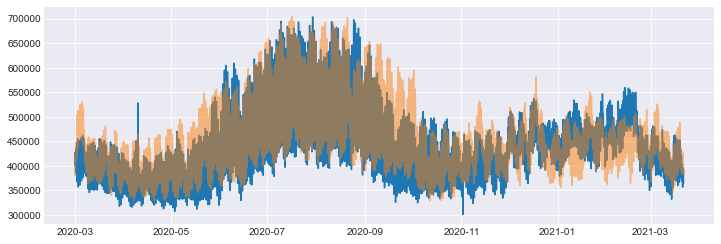

In [94]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test)
ax.plot(prediction_series, alpha=.5)
plt.show()

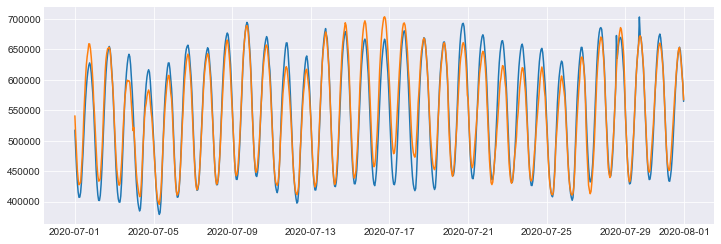

In [52]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plot_timeseries(ax, prediction_series.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plt.show()

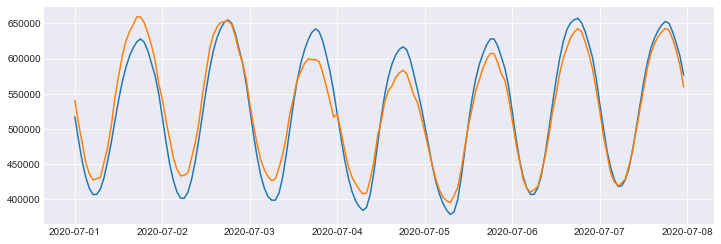

In [53]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-01 00:00:00': '2020-07-07 23:00:00'])
plot_timeseries(ax, prediction_series.loc['2020-07-01 00:00:00': '2020-07-07 23:00:00'])
plt.show()

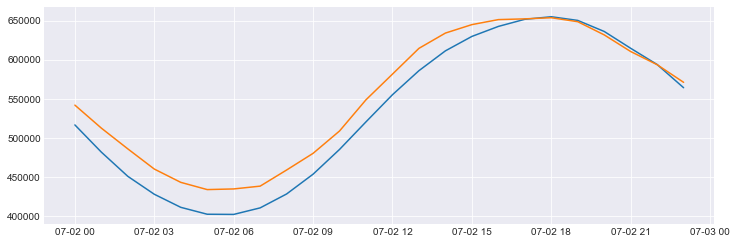

In [80]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-02 00:00:00': '2020-07-02 23:00:00'])
plot_timeseries(ax, prediction_series.loc['2020-07-02 00:00:00': '2020-07-02 23:00:00'])
plt.show()

In [58]:
def mean_abs_percent_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return f'Mean Absolute Percent Error: {np.mean(np.abs((y_test - y_pred)/y_test)) * 100:.2f}%'

In [59]:
mean_abs_percent_error(y_test, preds)

'Mean Absolute Percent Error: 6.54%'

In [74]:
xgb_grid = {'learning_rate': [.01, .1, .2],
                'max_depth': [2, 4, 8],
                'min_samples_leaf': [2, 4], 
                'max_features': ['sqrt', 'log2'],
                'n_estimators': [500, 1000, 1500]}

In [75]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


In [76]:
tscv = TimeSeriesSplit(n_splits=5)

In [77]:
xgbr_gridsearch = GridSearchCV(XGBRegressor(random_state=1), 
                            xgb_grid,
                            cv=tscv,
                            n_jobs=-1,
                            verbose=True,
                            scoring='neg_root_mean_squared_error')

In [78]:
xgbr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 50.5min finished


[15:49:17] WARNING: ../src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mono...
                                    num_parallel_tree=None, random_state=1,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                             

In [81]:
xgbr_gridsearch.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 1500}

In [82]:
best_gridsearch = XGBRegressor(**xgbr_gridsearch.best_params_)

In [83]:
best_gridsearch.fit(X_test, y_test)

[15:52:38] WARNING: ../src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=2,
             max_features='sqrt', min_child_weight=1, min_samples_leaf=2,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=8, num_parallel_tree=1, random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
best_preds = best_gridsearch.predict(X_test)

In [86]:
mean_abs_percent_error(y_test, best_preds)

'Mean Absolute Percent Error: 3.70%'

In [89]:
best_preds_series = pd.Series(best_preds, index=y_test.index)

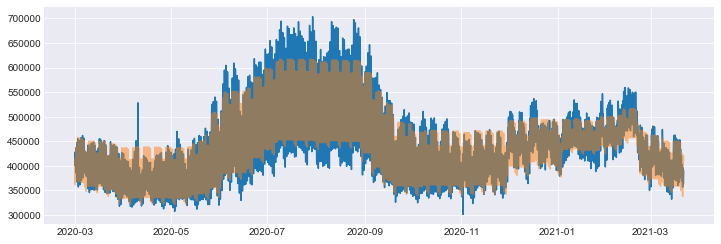

In [95]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test)
ax.plot(best_preds_series, alpha=.5)
plt.show()

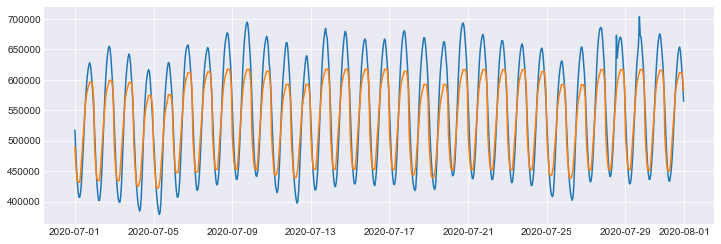

In [96]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plot_timeseries(ax, best_preds_series.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plt.show()

In [97]:
best_xgb_rmse = np.sqrt(mean_squared_error(best_preds, y_test))
best_xgb_rmse

22054.007474611597

In [98]:
from xgboost import plot_importance, plot_tree

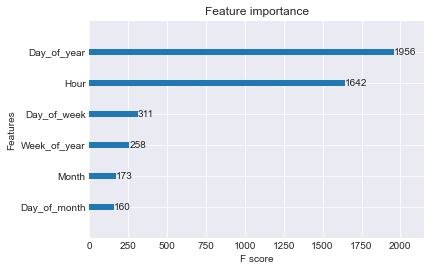

In [101]:
plot_importance(best_gridsearch);